### Team Contributions



**Lingyi Zheng:** &nbsp;&nbsp;&nbsp; 1. Introduction | 2. Data Preprocess

**Weihong Yang:** &nbsp;&nbsp;3. Training All Models | 4. Summary

**Wei Chen:**  &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;  5. Results Analysis | 6. Conclusion

## 1 Introduction

### 1.1 Abstract 

This paper analyzes under the situation of the Heart Attack Patients discharged from the hospitals, if demographics factors and the hospital codes are given, could the researcher and the medical personnel forecast the mortality of this patients. To answer this question, we compared the performance of six classification models with Python packages, using the data of Heart Attack Patients from all of the hospitals in New York State in 1993, including sex, age, diagnosis and length of stay. These pipeline workflows start with ingesting the raw data, preprocessing, training, predicting, visualizing, analyzing, and interpreting the findings. Our result shows that the performance of decision trees model is the best among these classification models. Results also revealed that given the data groups in the training dataset are unbalanced, some predictive results from the models might lose their validations. From a safety perspective, we suggest relative personnel should use SMOTE algorithm (Synthetic Minority Oversampling Technique) to equalize the samples groups before traning the data.

### 1.2 Background

Heart disease is the leading cause of death for both men and women. More than half of the deaths due to heart disease were men in 2015. Patients who are suffering a heart attack, but did not have surgery might face a higher likelihood of death. According to the clinical data on Heart Attack Patients discharged from all of the hospitals in New York State in 1993, where the admitting diagnosis was an Acute Myocardial Infarction (AMI), also called a heart attack, who did not have surgery, there are several factors that would influent patients’ death. It would be interesting to see if the factors are given, could medical staff predict the patients’ death reversely. This paper uses different models to compare and discuss which model’s predicted result is more realiable and accuratly, and comes to recommended forecasting for future clinical trial.

### 1.3  Data Analysis - Material and Method

The work methodology aims at understanding the factors related to demographics (sex, age) and hospital codes (diagnosis and length of stay) affecting the dying in the hospital. The statistical analysis was based on Python using existing algorithms and methods of the machine-based data analysis. In this paper, a combination of various approaches has been used in the methodology workflow. The Python language was applied for importing and manipulating the variable data and training different models, combined with using several python packages to visualize the final result.

## 2.Data Preprocess

### 2.1 Collecting data

This dataset is provided by Health Process Management, Doylestown, PA. It contains variables related to demographics (sex, age), variables related to hospital codes (diagnosis, length of stay), variables related to cost (charges) and variables related to mortality (died, DRG). In this experience, we use the training dataset that contains 12800 observations and 4 numeric variables. We select dying in the hospital (DIED) as our outcome variable, as it captures the correlation between patients’ death and other possible factors that would cause the dying.

### 2.2 Exploring and preparing the data

After being preprocessing this data set by Python, 12,800 data have been shown and they are divided into 10,000 training data set and 2,800 testing data set randomly for the purpose of traning the models.

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd

# Read the CSV file
heart_attack_data = pd.read_csv("/content/drive/MyDrive/whole_table.csv")

# Assign the data to the 'data' variable
data = heart_attack_data


In [61]:
# check if data has null value
data_sum_empty = data.isnull().sum()
print(data_sum_empty)

Patient      0
DIAGNOSIS    0
SEX          0
DRG          0
DIED         0
CHARGES      0
LOS          0
AGE          0
dtype: int64


In [16]:
import pandas as pd
import numpy as np

data["DIAGNOSIS"] = data["DIAGNOSIS"] - 41001
data["SEX"].replace("F",1,inplace = True)
data["SEX"].replace("M",2,inplace = True)
# since DRG is same as "died", which is predict lable, delete it
# and we don't need the unique code of patient and charges in this analysis so we delete it 
data = data.drop(["Patient","DRG","CHARGES"],axis = 1)
print(data)

       DIAGNOSIS  SEX  DIED  LOS  AGE
0             40    1     0   10   79
1             40    1     0    6   34
2             90    1     0    5   76
3             80    1     0    2   80
4             90    2     0    1   55
...          ...  ...   ...  ...  ...
12839         40    1     0   14   79
12840         90    1     0    7   91
12841         90    1     0    9   79
12842         50    2     0    5   70
12843         90    2     1    1   81

[12844 rows x 5 columns]


In [17]:
print(data.describe())

          DIAGNOSIS           SEX          DIED           LOS           AGE
count  12844.000000  12844.000000  12844.000000  12844.000000  12844.000000
mean      58.962161      1.605652      0.109779      7.568670     66.290330
std       31.740089      0.488729      0.312626      5.114986     13.654382
min        0.000000      1.000000      0.000000      0.000000     20.000000
25%       40.000000      1.000000      0.000000      4.000000     57.000000
50%       70.000000      2.000000      0.000000      7.000000     67.000000
75%       90.000000      2.000000      0.000000     10.000000     77.000000
max       90.000000      2.000000      1.000000     38.000000    103.000000


In [18]:
train_samples = 10000
train = data[:train_samples]
test= data[train_samples:]

Then, we take out the column DIED from the training data and keep the rest of the features as train_data variable; we also assign train_died_y variable as the value of column DIED. Therefore, the train_data is the input feature of the training dataset, and the train_died_y is the predict labels of the training dataset. It works as the same as the test_data and the test_died_y, where the test_data is the input feature of the testing dataset and the test_died_y is the predict labels of the testing dataset.

In [19]:
train_data = train.drop('DIED', axis = 1)
train_died_y = np.array(train.loc[:, 'DIED'].values)
test_data = test.drop('DIED', axis = 1)
test_died_y = test.loc[:, 'DIED'].values

## 3. Training Models

**Approchs Include:**

3.1 Naive Bayes |
3.2 k-Nearest Neighbors | 
3.3 Decision Tree | 
3.4 Logistic Regression | 
3.5 Support Vector Machine | 
3.6 Neural Network(MLP)


### 3.1 Naive Bayes Method:

**Naive Bayes Approach**

- Naive Bayes is a family of probabilistic supervised learning algorithms based on Bayes' theorem.
- It is particularly useful for classification tasks and can handle both binary and multi-class problems.
- Naive Bayes models are simple and efficient, making them well-suited for high-dimensional datasets or when a quick solution is needed.

**Why to use:**
- They work well when the independence assumption holds between the features, although this assumption may not always hold in practice.
- Naive Bayes models are also less prone to overfitting compared to other more complex models.


**Implementation Specifics:**

The code first trains a Gaussian Naive Bayes model using the training dataset and computes the accuracy on the testing dataset. It also computes the recall (sensitivity) for both the 'Died' and 'Not Died' classes using the confusion matrix.

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from sklearn import metrics

In [21]:
print("** Naive Bayes **")

NB = GaussianNB()
NB.fit(train_data,train_died_y)

predict_y = NB.predict(test_data)
acc = NB.score(test_data, test_died_y)
m = metrics.confusion_matrix(test_died_y, predict_y)

D_recall = m[1][1]/(m[1][0] + m[1][1])
ND_recall = m[0][0]/(m[0][0] + m[0][1])
Precision = m[1][1] / (m[1][1] + m[0][1])
F1_score = 2 * (Precision * D_recall) / (Precision + D_recall)

print("Test accuracy", acc)
print("DIED recall:",D_recall)
print("No DIED recall:",ND_recall)

** Naive Bayes **
Test accuracy 0.8948663853727145
DIED recall: 0.026058631921824105
No DIED recall: 1.0


In [22]:
print("** Naive Bayes **")

D_precision = m[1][1] / (m[1][1] + m[0][1]) if (m[1][1] + m[0][1]) != 0 else 0
ND_precision = m[0][0] / (m[0][0] + m[1][0])
D_f1 = 2 * (D_precision * D_recall) / (D_precision + D_recall) if (D_precision + D_recall) != 0 else 0
ND_f1 = 2 * (ND_precision * ND_recall) / (ND_precision + ND_recall)

print("Died Precision:", D_precision)
print("Not Died Precision:", ND_precision)
print("Died F1-score:", D_f1)
print("Not Died F1-score:", ND_f1)

** Naive Bayes **
Died Precision: 1.0
Not Died Precision: 0.8945698166431594
Died F1-score: 0.050793650793650794
Not Died F1-score: 0.9443513865624418


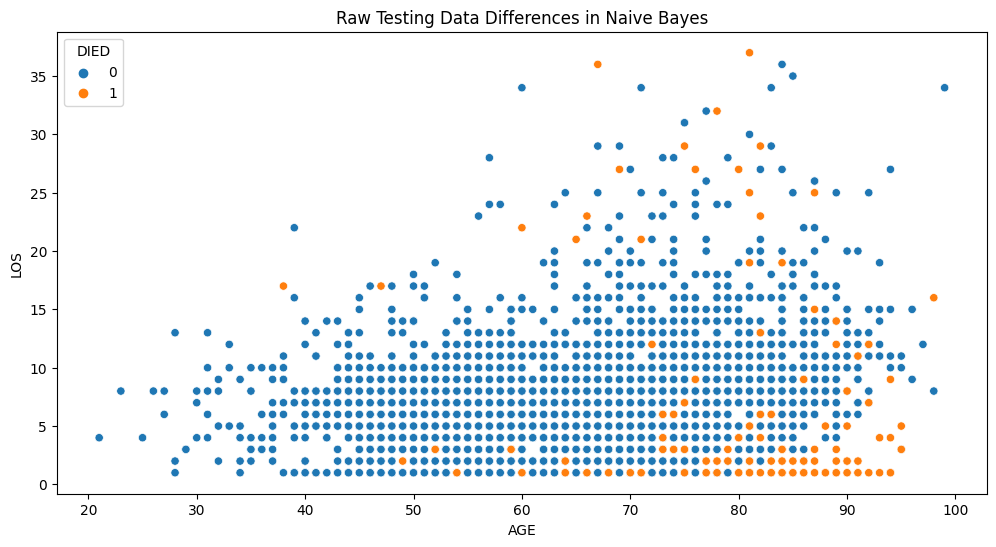

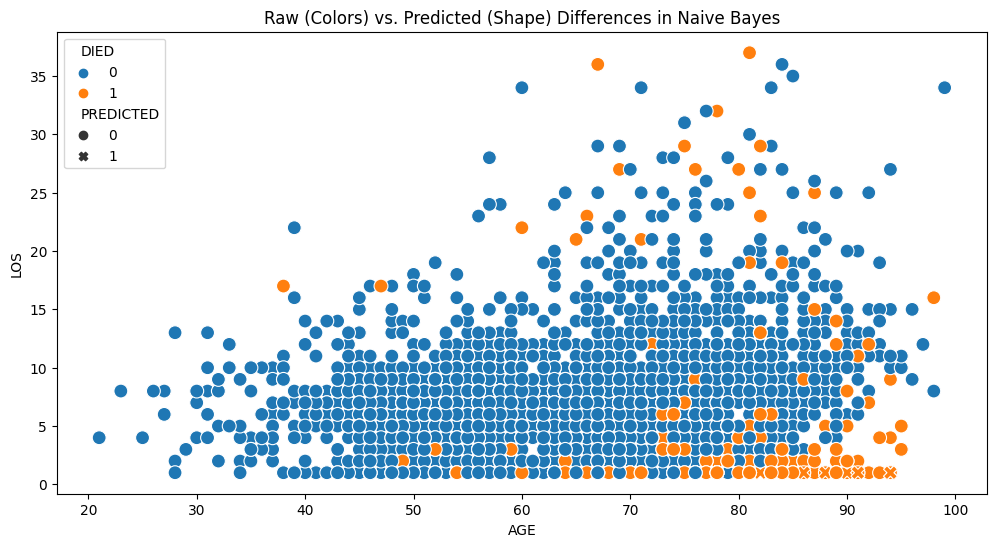

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


test_data_with_died = test_data.copy()
test_data_with_died['DIED'] = test_died_y

# Create the first plot (Raw Testing Data Differences in Naive Bayes)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=test_data_with_died, x='AGE', y='LOS', hue='DIED')
plt.title("Raw Testing Data Differences in Naive Bayes")
plt.legend(title='DIED')

test_data_with_predicted = test_data.copy()
test_data_with_predicted['DIED'] = test_died_y
test_data_with_predicted['PREDICTED'] = predict_y

# Create the second plot (Raw (Colors) vs. Predicted (Shape) Differences in Naive Bayes)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=test_data_with_predicted, x='AGE', y='LOS', hue='DIED', style='PREDICTED', s=100)
plt.title("Raw (Colors) vs. Predicted (Shape) Differences in Naive Bayes")
plt.show()


It then creates two plots:
1. A scatter plot showing the raw testing data differences with: 
 - 'AGE' on the x-axis.
 - 'LOS' on the y-axis,
 - 'DIED' attribute as the color-coding.

2. A scatter plot showing the raw (colors) vs. predicted (shape) differences with 'AGE' on the x

* Yellow dots: Patients acutally died.

* Blue dots: Patients who still alive.

* Blue circle | Yellow cross: means the model’s prediction is correct.
* Yellow circle and Blue cross: means the model’s prediction is wrong.


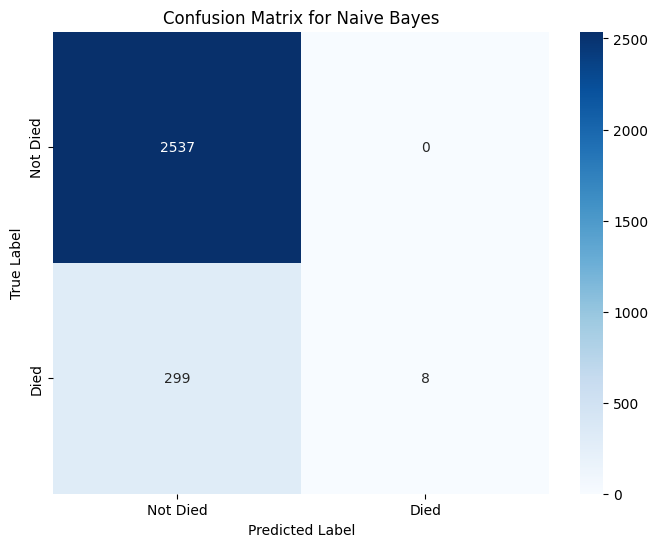

In [24]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(m, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Died', 'Died'], yticklabels=['Not Died', 'Died'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

Under the Naive Bayes Method prediction:

*  The graph shows that there are 4 True Positive, which mean this methods successfully predict 4 paitent’s death while make error on 82 False Negative on the alive patient group, which mean this methods’s prediction on paitent’s death is not reliabile but it can still successfully predict one paient is alive.



### 3.2 KNN Method

**k-Nearest Neighbors Approach**

- The k-Nearest Neighbors (k-NN) model is a non-parametric supervised learning algorithm used for both classification and regression tasks.
- The algorithm uses a distance metric (such as Euclidean, Manhattan, or Minkowski distance) to calculate the similarity between data points.
- In classification, the algorithm assigns the majority class label among the k nearest neighbors to the test data point.
- In regression, the algorithm assigns the average of the k nearest neighbors' target values as the predicted value.

**Why to use:**
- k-NN is a simple and easy-to-understand algorithm that does not require training and can work well when the data is low-dimensional.

**Implementation Specifics:**

The code first trains a k-Nearest Neighbors model using the training dataset and computes the accuracy on the testing dataset. It also computes the recall (sensitivity) for both the 'Died' and 'Not Died' classes using the confusion matrix.


In [25]:
print("** KNN Method **")

knn=KNeighborsClassifier()
knn.fit(train_data,train_died_y)

predict_y = knn.predict(test_data)
acc = knn.score(test_data, test_died_y)
m = metrics.confusion_matrix(test_died_y, predict_y)
D_recall = m[1][1]/(m[1][0] + m[1][1])
ND_recall = m[0][0]/(m[0][0] + m[0][1])

print("Test accuracy", acc)
print("DIED recall:",D_recall)
print("No DIED recall:",ND_recall)

** KNN Method **
Test accuracy 0.9170182841068917
DIED recall: 0.42671009771986973
No DIED recall: 0.9763500197083169


In [26]:
print("** KNN Method **")

D_precision = m[1][1] / (m[1][1] + m[0][1]) if (m[1][1] + m[0][1]) != 0 else 0
ND_precision = m[0][0] / (m[0][0] + m[1][0])
D_f1 = 2 * (D_precision * D_recall) / (D_precision + D_recall) if (D_precision + D_recall) != 0 else 0
ND_f1 = 2 * (ND_precision * ND_recall) / (ND_precision + ND_recall)

print("Died Precision:", D_precision)
print("Not Died Precision:", ND_precision)
print("Died F1-score:", D_f1)
print("Not Died F1-score:", ND_f1)

** KNN Method **
Died Precision: 0.6858638743455497
Not Died Precision: 0.9336600075386355
Died F1-score: 0.5261044176706827
Not Died F1-score: 0.9545279383429672


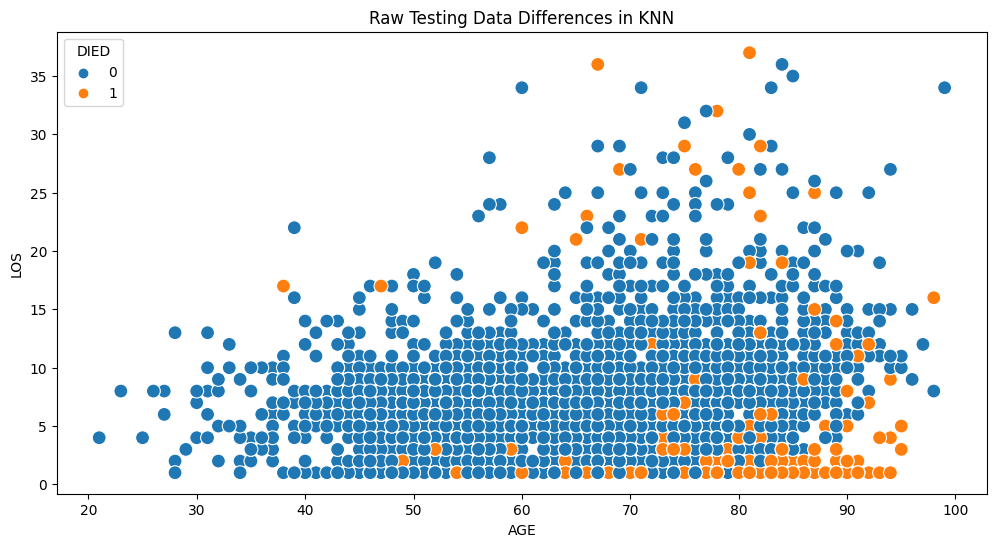

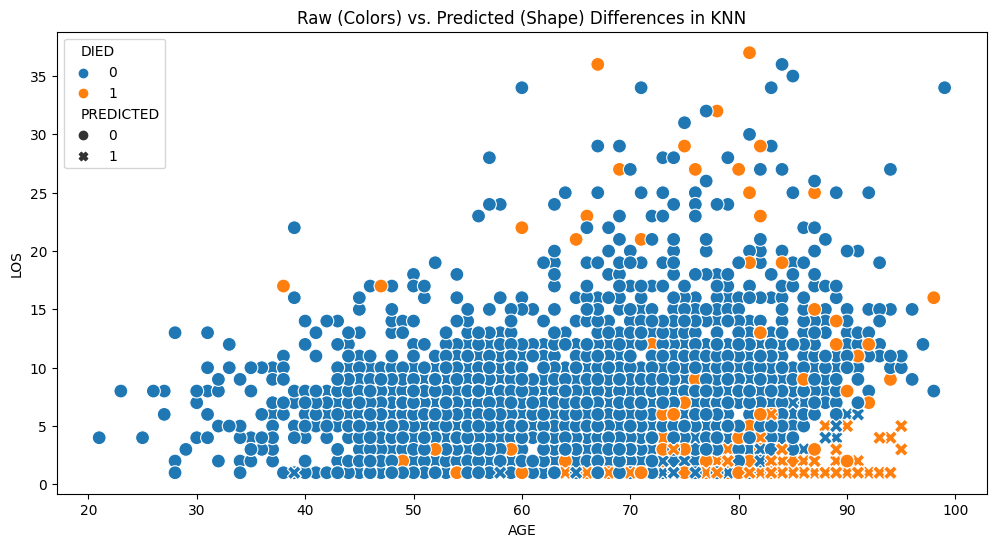

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_raw_vs_predicted(title, test_data, test_died_y, predict_y):
    test_data_with_died = test_data.copy()
    test_data_with_died['DIED'] = test_died_y

    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=test_data_with_died, x='AGE', y='LOS', hue='DIED', s=100 )
    plt.title(f"Raw Testing Data Differences in {title}")
    plt.legend(title='DIED')

    test_data_with_predicted = test_data.copy()
    test_data_with_predicted['DIED'] = test_died_y
    test_data_with_predicted['PREDICTED'] = predict_y

    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=test_data_with_predicted, x='AGE', y='LOS', hue='DIED', style='PREDICTED', s=100 )
    plt.title(f"Raw (Colors) vs. Predicted (Shape) Differences in {title}")
    plt.show()

plot_raw_vs_predicted('KNN', test, test_died_y, predict_y)


It then creates two plots:
1. A scatter plot showing the raw testing data differences with: 
 - 'AGE' on the x-axis.
 - 'LOS' on the y-axis,
 - 'DIED' attribute as the color-coding.

2. A scatter plot showing the raw (colors) vs. predicted (shape) differences with 'AGE' on the x

 -  Yellow dots: Patients acutally died.

 -  Blue dots: Patients who still alive.

 -  Blue circle | Yellow cross: means the model’s prediction is correct.
 - Yellow circle and Blue cross: means the model’s prediction is wrong.

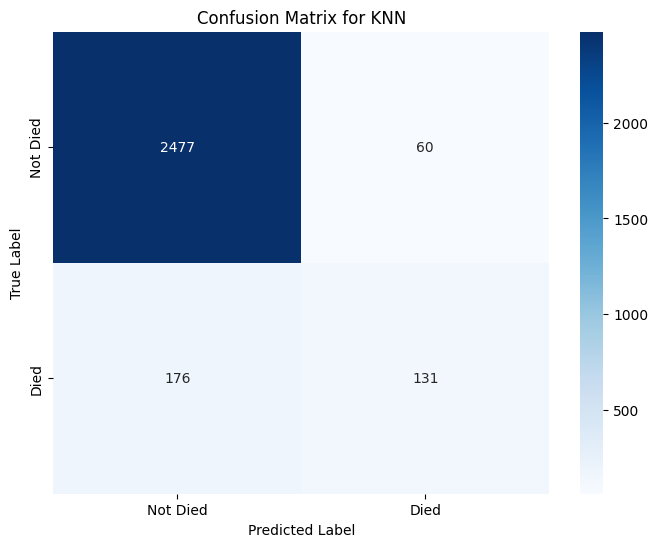

In [28]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(m, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Died', 'Died'], yticklabels=['Not Died', 'Died'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN')
plt.show()

Under the KNN prediction:

*  The graph shows that  there are 40 True Positive, which mean this methods successfully predict 40 paitent’s death while make error on 46 False Negative on the alive patient group, which mean this methods’s prediction on paitent’s death is not reliabile but it can still successfully predict one paient is alive.



### 3.3 Decision Tree Method

**Decision Tree Approach**

- A Decision Tree is a supervised learning model used for both classification and regression tasks.
- It is a tree-like structure where each internal node represents a feature or attribute, each branch represents a decision rule based on the feature value, and each leaf node represents the outcome or a class label (in classification) or a continuous value (in regression).

**Why to use:**
- Decision Trees are easy to understand and interpret, and can handle both categorical and numerical data.
- They can also handle missing values and outliers.
- However, decision trees can be prone to overfitting and may not generalize well to new data.



**Implementation Specifics:**

The code first trains a Decision Tree model using the training dataset and computes the accuracy on the testing dataset. It also computes the recall (sensitivity) for both the 'Died' and 'Not Died' classes using the confusion matrix.

In [29]:
print("** DecisionTree Method ** ")

tree = DecisionTreeClassifier(random_state=0)
tree.fit(train_data,train_died_y)

predict_y = tree.predict(test_data)
acc = tree.score(test_data, test_died_y)
m = metrics.confusion_matrix(test_died_y, predict_y)
D_recall = m[1][1]/(m[1][0] + m[1][1])
ND_recall = m[0][0]/(m[0][0] + m[0][1])

print("Test accuracy", acc)
print("DIED samples recall:",D_recall)
print("No DIED samples recall:",ND_recall)

** DecisionTree Method ** 
Test accuracy 0.8895921237693389
DIED samples recall: 0.38436482084690554
No DIED samples recall: 0.9507292077256603


In [30]:
print("** DecisionTree Method ** ")

D_precision = m[1][1] / (m[1][1] + m[0][1]) if (m[1][1] + m[0][1]) != 0 else 0
ND_precision = m[0][0] / (m[0][0] + m[1][0])
D_f1 = 2 * (D_precision * D_recall) / (D_precision + D_recall) if (D_precision + D_recall) != 0 else 0
ND_f1 = 2 * (ND_precision * ND_recall) / (ND_precision + ND_recall)

print("Died Precision:", D_precision)
print("Not Died Precision:", ND_precision)
print("Died F1-score:", D_f1)
print("Not Died F1-score:", ND_f1)

** DecisionTree Method ** 
Died Precision: 0.48559670781893005
Not Died Precision: 0.9273356401384083
Died F1-score: 0.42909090909090913
Not Died F1-score: 0.9388867263526666


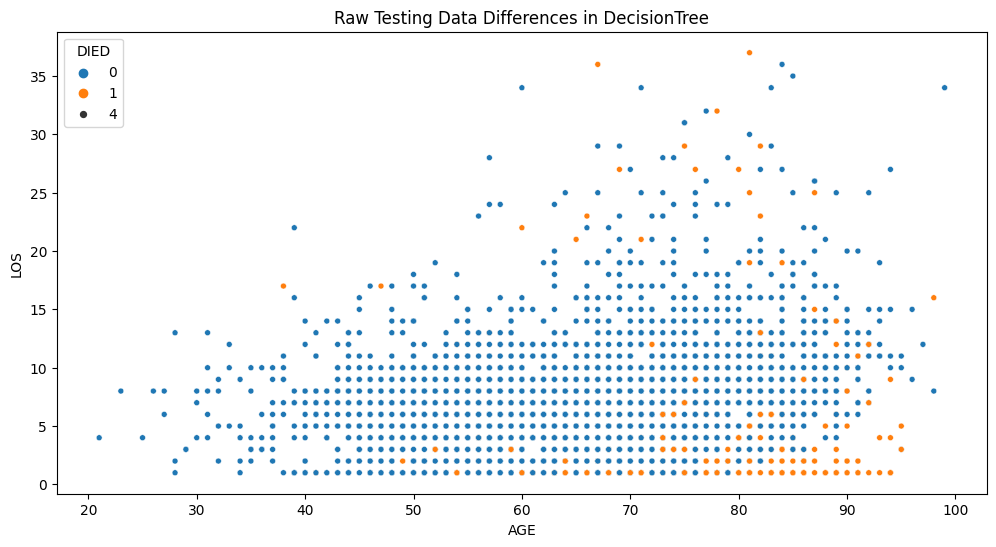

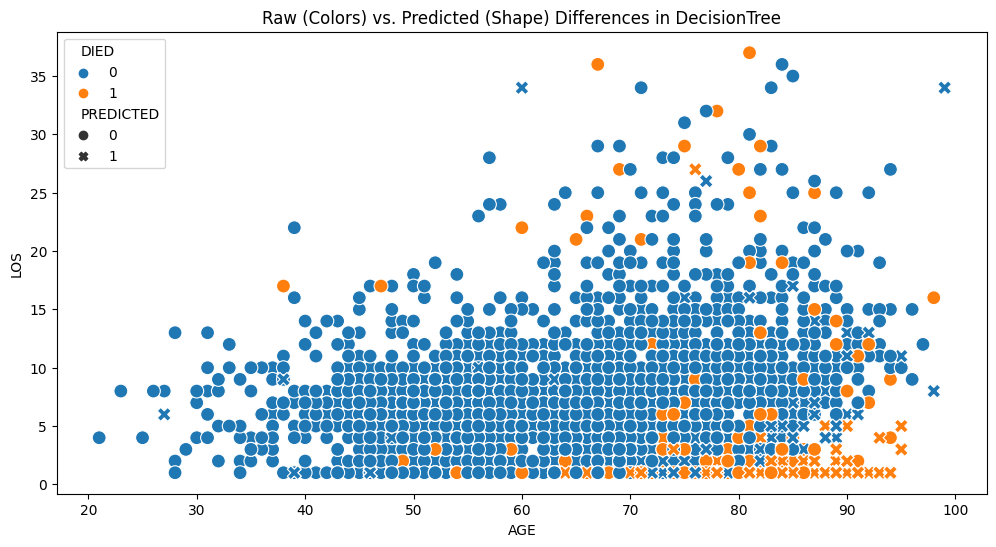

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_raw_vs_predicted(title, test_data, test_died_y, predict_y):
    test_data_with_died = test_data.copy()
    test_data_with_died['DIED'] = test_died_y

    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=test_data_with_died, x='AGE', y='LOS', hue='DIED', size=4)
    plt.title(f"Raw Testing Data Differences in {title}")
    plt.legend(title='DIED')

    test_data_with_predicted = test_data.copy()
    test_data_with_predicted['DIED'] = test_died_y
    test_data_with_predicted['PREDICTED'] = predict_y

    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=test_data_with_predicted, x='AGE', y='LOS', hue='DIED', style='PREDICTED', s=100)
    plt.title(f"Raw (Colors) vs. Predicted (Shape) Differences in {title}")
    plt.show()

plot_raw_vs_predicted('DecisionTree', test, test_died_y, predict_y)


It then creates two plots:
1. A scatter plot showing the raw testing data differences with: 
 - 'AGE' on the x-axis.
 - 'LOS' on the y-axis,
 - 'DIED' attribute as the color-coding.

2. A scatter plot showing the raw (colors) vs. predicted (shape) differences with 'AGE' on the x

* Yellow dots: Patients acutally died.

* Blue dots: Patients who still alive.

* Blue circle | Yellow cross: means the model’s prediction is correct.
* Yellow circle and Blue cross: means the model’s prediction is wrong.

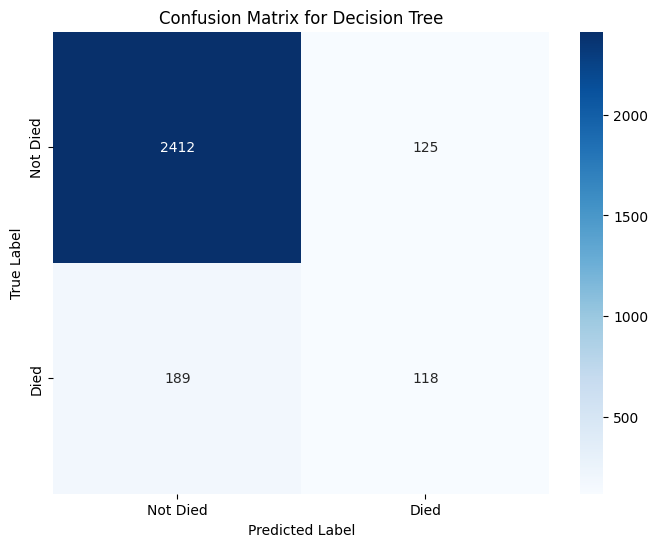

In [32]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(m, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Died', 'Died'], yticklabels=['Not Died', 'Died'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

*  The graph shows that under the Decision Tree Method prediction, there are 37 True Positive, which mean this methods successfully predict 37 paitent’s death while make error on 49 False Negative on the alive patient group.

### 3.4 Logistics Regression Method

**Logistic Regression Approach**

- Logistic Regression is a statistical and machine learning model used for binary classification tasks.
- It models the relationship between a continuous dependent variable and one or more independent variables.

**Why to use:**

- Logistic Regression models are simple and easy to interpret, and can handle both categorical and numerical data.
- They can also provide probabilistic predictions, which can be useful for decision making.
- However, logistic regression assumes a linear relationship between the input features and the output, which may not hold in practice.

**Implementation Specifics:**

The code first trains a Logistic Regression model using the training dataset and computes the accuracy on the testing dataset. It also computes the recall (sensitivity) for both the 'Died' and 'Not Died' classes using the confusion matrix.

In [33]:
print("** Logistic Regression **")

lr=LogisticRegression()
lr.fit(train_data,train_died_y)

predict_y = lr.predict(test_data)
acc = lr.score(test_data, test_died_y)
m = metrics.confusion_matrix(test_died_y, predict_y)
D_recall = m[1][1]/(m[1][0] + m[1][1])
ND_recall = m[0][0]/(m[0][0] + m[0][1])

print("Test accuracy", acc)
print("Died Recall:", D_recall)
print("Not Died Recall:", ND_recall)

** Logistic Regression **
Test accuracy 0.9145569620253164
Died Recall: 0.23452768729641693
Not Died Recall: 0.9968466692944422


In [34]:
print("** Logistic Regression **")

D_precision = m[1][1] / (m[1][1] + m[0][1]) if (m[1][1] + m[0][1]) != 0 else 0
ND_precision = m[0][0] / (m[0][0] + m[1][0])
D_f1 = 2 * (D_precision * D_recall) / (D_precision + D_recall) if (D_precision + D_recall) != 0 else 0
ND_f1 = 2 * (ND_precision * ND_recall) / (ND_precision + ND_recall)

print("Died Precision:", D_precision)
print("Not Died Precision:", ND_precision)
print("Died F1-score:", D_f1)
print("Not Died F1-score:", ND_f1)

** Logistic Regression **
Died Precision: 0.9
Not Died Precision: 0.9149782923299565
Died F1-score: 0.37209302325581395
Not Died F1-score: 0.9541595925297113


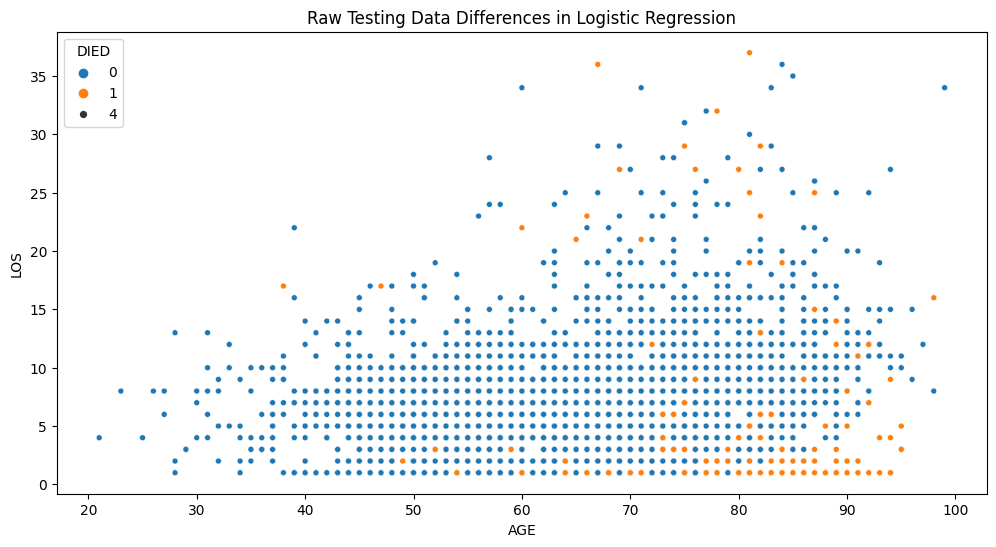

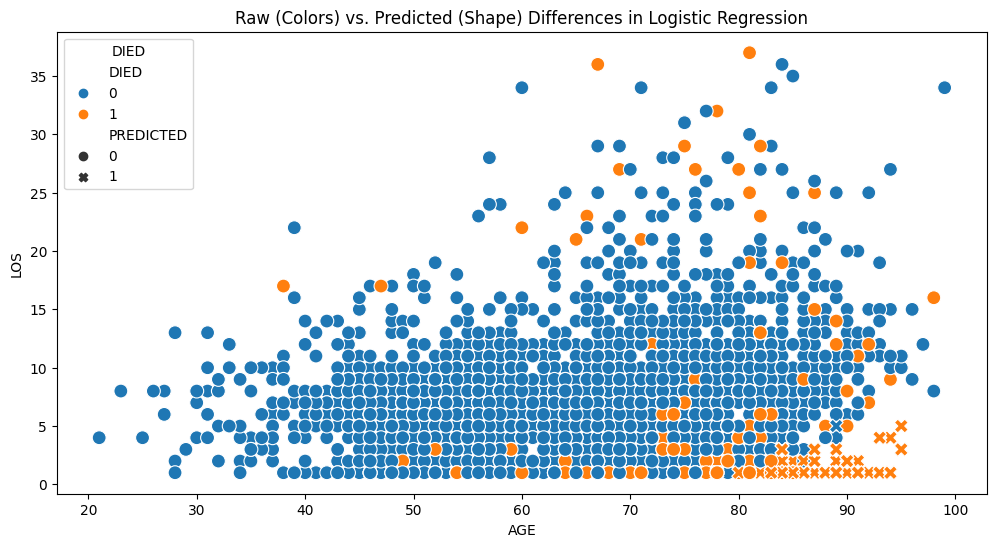

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_raw_vs_predicted(title, test_data, test_died_y, predict_y):
    test_data_with_died = test_data.copy()
    test_data_with_died['DIED'] = test_died_y

    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=test_data_with_died, x='AGE', y='LOS', hue='DIED', size=4)
    plt.title(f"Raw Testing Data Differences in {title}")
    plt.legend(title='DIED')

    test_data_with_predicted = test_data.copy()
    test_data_with_predicted['DIED'] = test_died_y
    test_data_with_predicted['PREDICTED'] = predict_y

    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=test_data_with_predicted, x='AGE', y='LOS', hue='DIED', style='PREDICTED', s=100)
    plt.title(f"Raw (Colors) vs. Predicted (Shape) Differences in {title}")
    plt.legend(title='DIED')

    plt.show()

plot_raw_vs_predicted('Logistic Regression', test, test_died_y, predict_y)


It then creates two plots:
1. A scatter plot showing the raw testing data differences with: 
 - 'AGE' on the x-axis.
 - 'LOS' on the y-axis,
 - 'DIED' attribute as the color-coding.

2. A scatter plot showing the raw (colors) vs. predicted (shape) differences with 'AGE' on the x

* Yellow dots: Patients acutally died.

* Blue dots: Patients who still alive.

* Blue circle | Yellow cross: means the model’s prediction is correct.
* Yellow circle and Blue cross: means the model’s prediction is wrong.

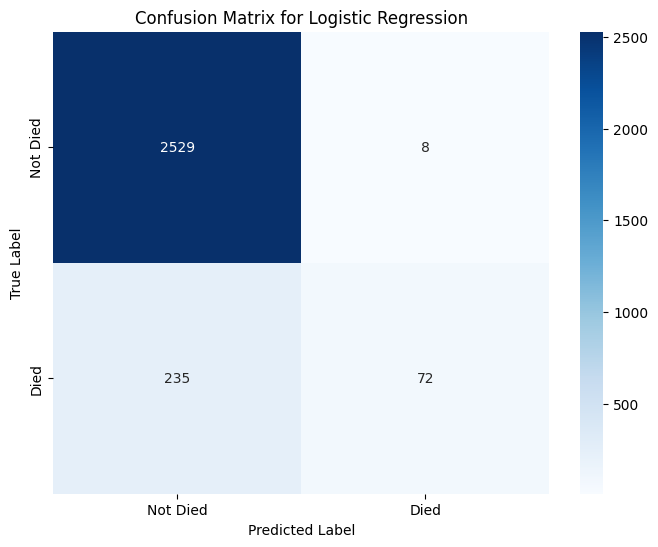

In [36]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(m, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Died', 'Died'], yticklabels=['Not Died', 'Died'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

*  The graph shows that there are 19 True Positive, which mean this methods successfully predict 19 paitent’s death while make error on 67 False Negative on the alive patient group.

### 3.5 Support Vector Machine Method

**Support Vector Machine Approach**

- A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks.
- In the context of classification, an SVM classifier works by finding the optimal hyperplane that separates the classes in the feature space.
- The hyperplane is chosen in a way that maximizes the margin between the classes, which is the distance between the hyperplane and the closest data points from each class.
- These closest data points are called support vectors, as they "support" the definition of the hyperplane.

**Why to use:**
- SVMs can handle both linear and non-linear decision boundaries using different kernel functions.
- They are particularly useful when the data is high-dimensional and the number of features is larger than the number of samples.
- However, SVMs can be sensitive to the choice of kernel function and the tuning of hyperparameters.

**Implementation Specifics:**

The code first trains a Support Vector model using the training dataset and computes the accuracy on the testing dataset. It also computes the recall (sensitivity) for both the 'Died' and 'Not Died' classes using the confusion matrix.

In [37]:
print("** SVM Method **")

svm=SVC()
svm.fit(train_data,train_died_y)

predict_y = svm.predict(test_data)
acc = svm.score(test_data, test_died_y)
m = metrics.confusion_matrix(test_died_y, predict_y)
D_recall = m[1][1]/(m[1][0] + m[1][1])
ND_recall = m[0][0]/(m[0][0] + m[0][1])

print("Test accuracy", acc)
print("DIED recall:",D_recall)
print("No DIED recall:",ND_recall)

** SVM Method **
Test accuracy 0.8920534458509142
DIED recall: 0.0
No DIED recall: 1.0


In [38]:
print("** SVM Method **")

D_precision = m[1][1] / (m[1][1] + m[0][1]) if (m[1][1] + m[0][1]) != 0 else 0
ND_precision = m[0][0] / (m[0][0] + m[1][0])
D_f1 = 2 * (D_precision * D_recall) / (D_precision + D_recall) if (D_precision + D_recall) != 0 else 0
ND_f1 = 2 * (ND_precision * ND_recall) / (ND_precision + ND_recall)

print("Died Precision:", D_precision)
print("Not Died Precision:", ND_precision)
print("Died F1-score:", D_f1)
print("Not Died F1-score:", ND_f1)

** SVM Method **
Died Precision: 0
Not Died Precision: 0.8920534458509142
Died F1-score: 0
Not Died F1-score: 0.942947407545066


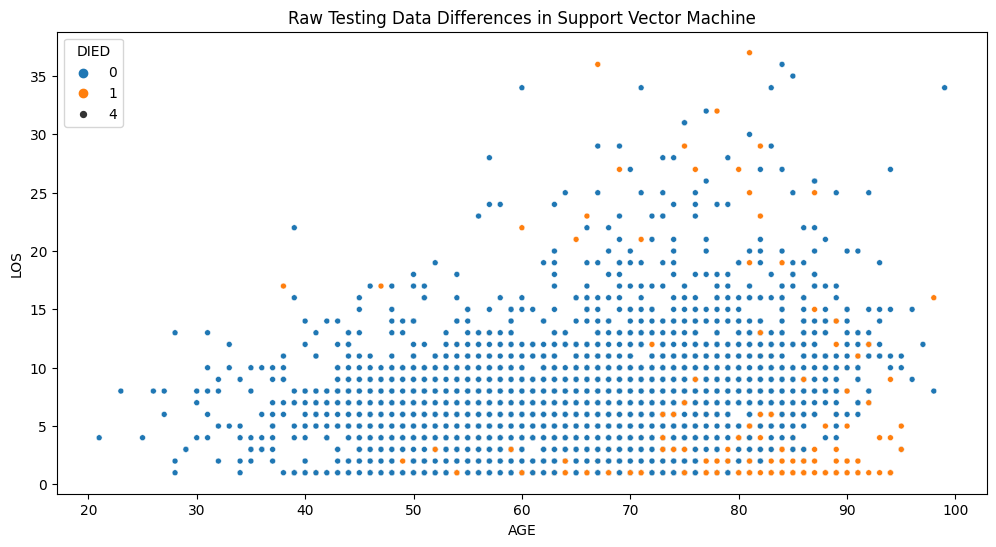

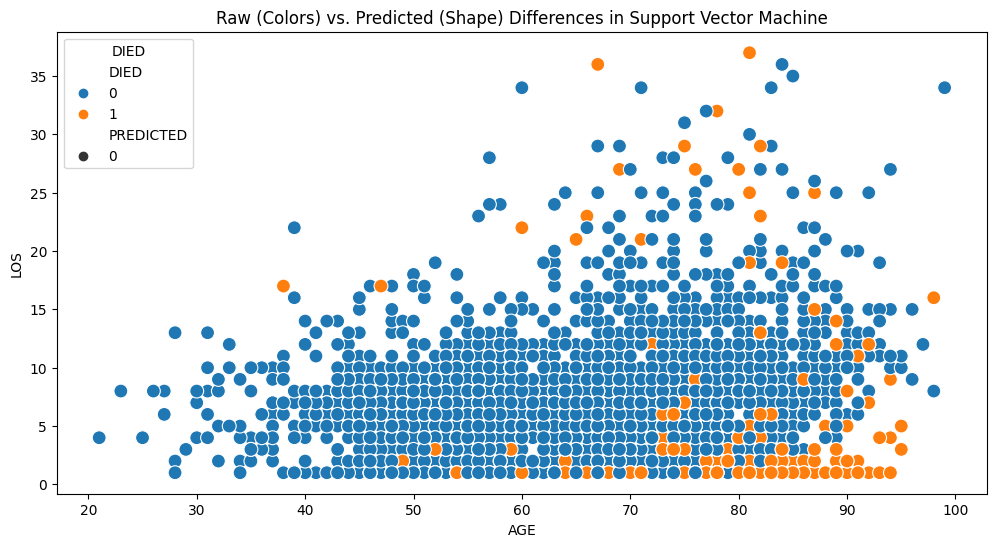

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_raw_vs_predicted(title, test_data, test_died_y, predict_y):
    test_data_with_died = test_data.copy()
    test_data_with_died['DIED'] = test_died_y

    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=test_data_with_died, x='AGE', y='LOS', hue='DIED', size=4)
    plt.title(f"Raw Testing Data Differences in {title}")
    plt.legend(title='DIED')

    test_data_with_predicted = test_data.copy()
    test_data_with_predicted['DIED'] = test_died_y
    test_data_with_predicted['PREDICTED'] = predict_y

    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=test_data_with_predicted, x='AGE', y='LOS', hue='DIED', style='PREDICTED', s=100)
    plt.title(f"Raw (Colors) vs. Predicted (Shape) Differences in {title}")
    plt.legend(title='DIED')

    plt.show()

plot_raw_vs_predicted('Support Vector Machine', test, test_died_y, predict_y)


It then creates two plots:
1. A scatter plot showing the raw testing data differences with: 
 - 'AGE' on the x-axis.
 - 'LOS' on the y-axis,
 - 'DIED' attribute as the color-coding.

2. A scatter plot showing the raw (colors) vs. predicted (shape) differences with 'AGE' on the x

* Yellow dots: Patients acutally died.

* Blue dots: Patients who still alive.

* Blue circle | Yellow cross: means the model’s prediction is correct.
* Yellow circle and Blue cross: means the model’s prediction is wrong.

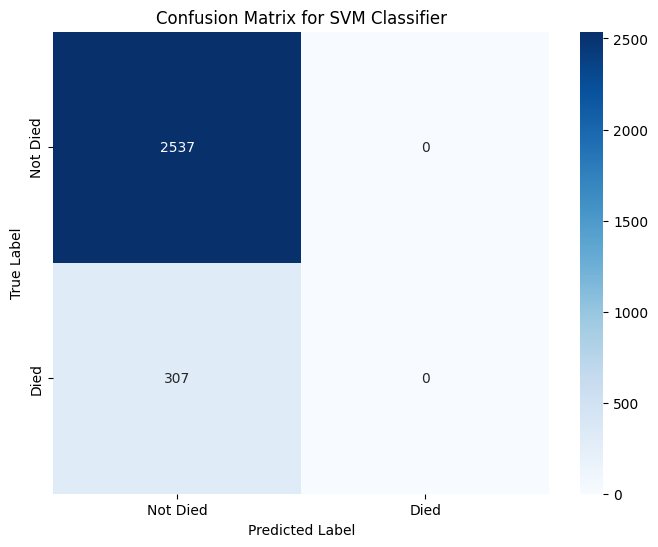

In [40]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(m, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Died', 'Died'], yticklabels=['Not Died', 'Died'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

Under the Support Vector Machine Method prediction:

* The graph shows that there are 0 True Positive, which mean this methods successfully predict 0 paitent’s death while make error on 86 False Negative on the alive patient group, which means all the patients are alive. 
*  Since the dead recall rate is 0, It doesn’t successfully predict how many people died. It indicates this model is not reliable.

### 3.6 Neural Network

**Neural Network(MLP) Approach**

- An MLP (Multi-Layer Perceptron) neural network classifier is a type of artificial neural network that consists of multiple layers of neurons connected in a feedforward manner.
- It is a supervised learning algorithm used for classification tasks where the goal is to predict the class label of input data.

**Why to use neural network**

 - They are able to learn complex nonlinear relationships between the input features and the output and can capture high-level abstract features from raw data. 
 - Neural networks can handle both categorical and numerical data, and are able to automatically extract relevant features from the input data, reducing the need for feature engineering.
They are also able to generalize well to new data and can handle noisy or incomplete data.
 - However, neural networks can be computationally expensive to train, particularly for large datasets, and can be difficult to interpret. Additionally, they require a significant amount of data to train effectively.

**Implementation Specifics:**

The code first trains a (MLP) Neural Network model using the training dataset and computes the accuracy on the testing dataset. It also computes the recall (sensitivity) for both the 'Died' and 'Not Died' classes using the confusion matrix.

In [41]:
from sklearn.preprocessing import StandardScaler

print("** Neural Network(MLP) ** ")

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

mlp = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5, hidden_layer_sizes=(10,), max_iter=500)

mlp.fit(train_data_scaled, train_died_y)
predict_y = mlp.predict(test_data_scaled)
acc = mlp.score(test_data_scaled, test_died_y)
m = metrics.confusion_matrix(test_died_y, predict_y)
D_recall = m[1][1]/(m[1][0] + m[1][1])
ND_recall = m[0][0]/(m[0][0] + m[0][1])

print("Test accuracy", acc)
print("DIED samples recall:",D_recall)
print("No DIED samples recall:",ND_recall)

** Neural Network(MLP) ** 
Test accuracy 0.9222925457102672
DIED samples recall: 0.42996742671009774
No DIED samples recall: 0.9818683484430429


In [42]:
print("** Neural Network(MLP) ** ")
D_precision = m[1][1] / (m[1][1] + m[0][1]) if (m[1][1] + m[0][1]) != 0 else 0
ND_precision = m[0][0] / (m[0][0] + m[1][0])

D_f1 = 2 * (D_precision * D_recall) / (D_precision + D_recall) if (D_precision + D_recall) != 0 else 0
ND_f1 = 2 * (ND_precision * ND_recall) / (ND_precision + ND_recall)

print("Died Precision:", D_precision)
print("Not Died Precision:", ND_precision)

print("Died F1-score:", D_f1)
print("Not Died F1-score:", ND_f1)

** Neural Network(MLP) ** 
Died Precision: 0.7415730337078652
Not Died Precision: 0.9343585896474118
Died F1-score: 0.5443298969072166
Not Died F1-score: 0.9575245050932154


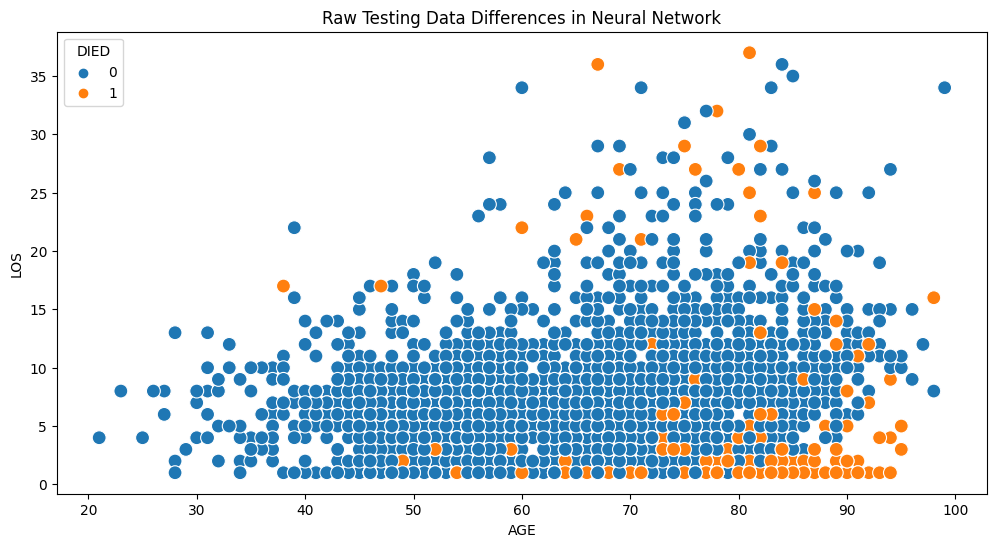

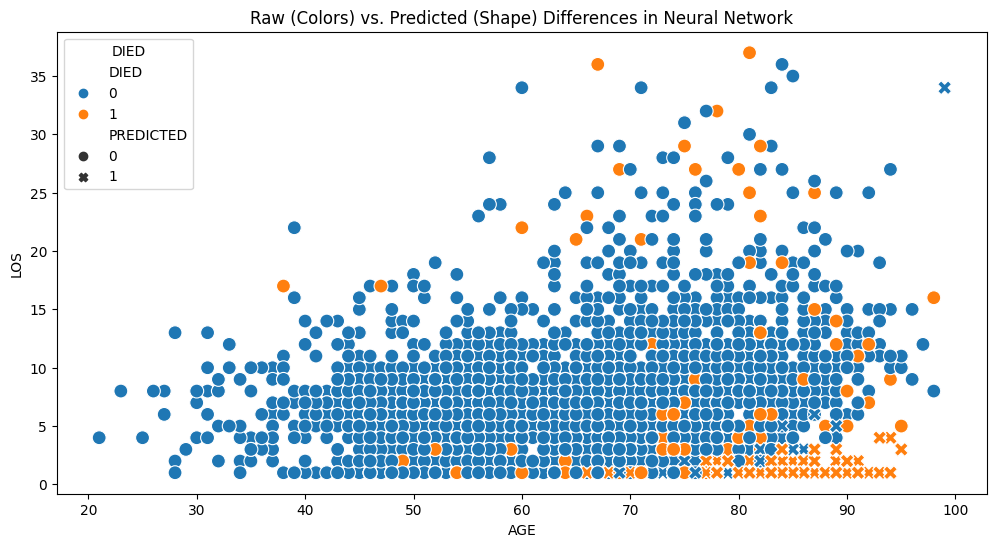

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_raw_vs_predicted(title, test_data, test_died_y, predict_y):
    test_data_with_died = test_data.copy()
    test_data_with_died['DIED'] = test_died_y

    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=test_data_with_died, x='AGE', y='LOS', hue='DIED', s=100)
    plt.title(f"Raw Testing Data Differences in {title}")
    plt.legend(title='DIED')

    test_data_with_predicted = test_data.copy()
    test_data_with_predicted['DIED'] = test_died_y
    test_data_with_predicted['PREDICTED'] = predict_y

    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=test_data_with_predicted, x='AGE', y='LOS', hue='DIED', style='PREDICTED', s=100)
    plt.title(f"Raw (Colors) vs. Predicted (Shape) Differences in {title}")
    plt.legend(title='DIED')

    plt.show()

plot_raw_vs_predicted('Neural Network', test, test_died_y, predict_y)


It then creates two plots:
1. A scatter plot showing the raw testing data differences with: 
 - 'AGE' on the x-axis.
 - 'LOS' on the y-axis,
 - 'DIED' attribute as the color-coding.

2. A scatter plot showing the raw (colors) vs. predicted (shape) differences with 'AGE' on the x

* Yellow dots: Patients acutally died.

* Blue dots: Patients who still alive.

* Blue circle | Yellow cross: means the model’s prediction is correct.
* Yellow circle and Blue cross: means the model’s prediction is wrong.

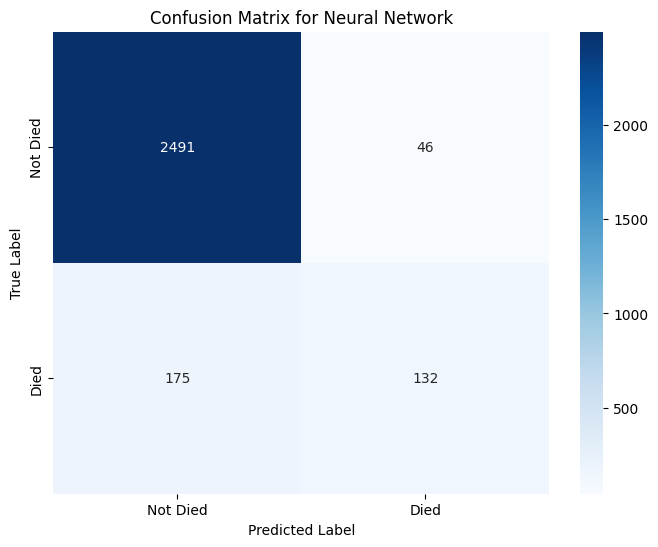

In [44]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(m, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Died', 'Died'], yticklabels=['Not Died', 'Died'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Neural Network')
plt.show()

Under the Neural Network Method prediction:
 
* The graph shows that there are 40 True Positive, which mean this methods successfully predict 40 paitent’s death while make error on 46 False Negative on the alive patient group, which means all the patients are alive. 


### 3.7 Summary Table - (Original Traing Models)

| Models                 | Test Accuracy | Death sample recall rate | Non-death sample recall rate | Death Precision | Death F1-score | Non-death Precision | Non-death F1-score |
|------------------------|---------------|--------------------------|------------------------------|-----------------|----------------|---------------------|--------------------|
| **Naive Bayes**        | 90.28%        | 4.65%                    | 100.00%                      | 100.00%         | 8.89%          | 90.24%              | 94.87%             |
| **KNN**                | 91.94%        | 46.51%                   | 97.10%                       | 64.52%          | 54.05%         | 94.12%              | 95.58%             |
| **Decision Trees**     | 89.93%        | 43.02%                   | 95.25%                       | 50.68%          | 46.54%         | 93.64%              | 94.44%             |
| **Logistics Regression**| 91.71%       | 22.09%                   | 99.60%                       | 86.36%          | 35.19%         | 91.85%              | 95.57%             |
| **Support Vector Machine**| 89.81%      | 0.00%                    | 100.00%                      | 0.00%           | 0.0%           | 89.81%              | 94.63%             |
| **Neural Networks**    | 92.77%        | 46.51%                   | 98.02%                       | 72.73%          | 56.74%         | 94.17%              | 96.06%             |


## 4. SMOTE Improvements

**SMOTE Algo Approach:**

SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling technique used in machine learning to address class imbalance. Class imbalance refers to the situation where one class (the minority class) has significantly fewer samples than the other class(es) (the majority class(es)) in a binary or multi-class classification problem.

**Why Use SMOTE Algo For Improvements:**

The reason why some of the non-death sample recall rate is exist bias is previously in the training dataset, the ratio of death to non-death is unbalanced. Therefore, in order to make the sample blanced so that the result could be validated, we use the SMOTE (stands for Synthetic Minority Oversampling Technique) algorithm to equalize the positive and negative samples.

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import numpy as np
from sklearn import metrics
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [47]:
file_path = "/content/drive/MyDrive/whole_table.csv"

DIAGNOSIS_dict = {}
data = []
label_died = []

with open(file_path, "r", encoding='utf-8') as f:
    next(f)  # Skip the header line
    for line in f:
        one_record = line.split(",")
        diagnosis = int(one_record[1]) - 41011
        sex = 1 if one_record[2] == "F" else 2
        died = int(one_record[4])
        los = int(one_record[6])
        age = int(one_record[7])
        data.append([diagnosis, sex, los, age])
        label_died.append(died)

train_samples = 10000
train_data = np.array(data[:train_samples])
train_died_y = np.array(label_died[:train_samples])

print("** SMOTE algorithm for balancing data **")

model_smote = SMOTE() 
train_data, train_died_y = model_smote.fit_resample(train_data, train_died_y)  
test_data = np.array(data[train_samples:])
test_died_y = np.array(label_died[train_samples:])
train_data = np.array(train_data)
train_died_y = np.array(train_died_y)

print("train data shape :  " + str(train_data.shape))
print("test data shape : " + str(test_data.shape))

** SMOTE algorithm for balancing data **
train data shape :  (17794, 4)
test data shape : (2844, 4)


### 4.1 Naive Bayes(SMOTE)

In [48]:
print("** Naive Bayes **")

NB = GaussianNB()
NB.fit(train_data, train_died_y)
predict_y = NB.predict(test_data)

print("Training Accuracy:", NB.score(train_data, train_died_y))
print("Test Accuracy:", NB.score(test_data, test_died_y))
print("Confusion matrix:")
print(metrics.confusion_matrix(test_died_y, predict_y))

m = metrics.confusion_matrix(test_died_y, predict_y)
D_recall = m[1][1] / (m[1][0] + m[1][1])
ND_recall = m[0][0] / (m[0][0] + m[0][1])

print("No DIED recall:", ND_recall)
print("DIED recall:", D_recall)

** Naive Bayes **
Training Accuracy: 0.7522760481061032
Test Accuracy: 0.7232770745428974
Confusion matrix:
[[1839  698]
 [  89  218]]
No DIED recall: 0.7248718959400867
DIED recall: 0.7100977198697068


### 4.2 KNN(SMOTE)

In [49]:
print("** KNN Method **")

knn = KNeighborsClassifier()
knn.fit(train_data, train_died_y)
predict_y = knn.predict(test_data)

print("Training Accuracy:", knn.score(train_data, train_died_y))
print("Test Accuracy:", knn.score(test_data, test_died_y))
print("Confusion matrix:")
print(metrics.confusion_matrix(test_died_y, predict_y))

m = metrics.confusion_matrix(test_died_y, predict_y)
D_recall = m[1][1] / (m[1][0] + m[1][1])
ND_recall = m[0][0] / (m[0][0] + m[0][1])

print("No DIED recall:", ND_recall)
print("DIED recall:", D_recall)

** KNN Method **
Training Accuracy: 0.8684949983140384
Test Accuracy: 0.8470464135021097
Confusion matrix:
[[2216  321]
 [ 114  193]]
No DIED recall: 0.8734726054394955
DIED recall: 0.6286644951140065


### 4.3 Decision Tree(SMOTE)

In [50]:
print("** DecisionTree Method ** ")

tree = DecisionTreeClassifier(random_state=0)
tree.fit(train_data, train_died_y)
feat_importance = tree.tree_.compute_feature_importances(normalize=False)
predict_y = tree.predict(test_data)

print("feat importance = " + str(feat_importance))
print("Training Accuracye:", tree.score(train_data, train_died_y))
print("Test Accuracy:", tree.score(test_data, test_died_y))
print("Confusion matrix:")
print(metrics.confusion_matrix(test_died_y, predict_y))

m = metrics.confusion_matrix(test_died_y, predict_y)
D_recall = m[1][1] / (m[1][0] + m[1][1])
ND_recall = m[0][0] / (m[0][0] + m[0][1])

print("No DIED recall:", ND_recall)
print("DIED recall:", D_recall)

** DecisionTree Method ** 
feat importance = [0.05300579 0.03861724 0.18088434 0.12120295]
Training Accuracye: 0.9214341913004384
Test Accuracy: 0.8129395218002813
Confusion matrix:
[[2131  406]
 [ 126  181]]
No DIED recall: 0.8399684666929444
DIED recall: 0.5895765472312704


### 4.4 Logistic Regression(SMOTE)

In [51]:
print("** Logistic Regression **")

lr = LogisticRegression(class_weight='balanced')
lr.fit(train_data, train_died_y)
predict_y = lr.predict(test_data)

print("Training Accuracy:", lr.score(train_data, train_died_y))
print("Test Accuracy:", lr.score(test_data, test_died_y))
print("Confusion matrix:")
print(metrics.confusion_matrix(test_died_y, predict_y))

m = metrics.confusion_matrix(test_died_y, predict_y)
D_recall = m[1][1] / (m[1][0] + m[1][1])
ND_recall = m[0][0] / (m[0][0] + m[0][1])

print("No DIED recall:", ND_recall)
print("DIED recall:", D_recall)

** Logistic Regression **
Training Accuracy: 0.7687984713948522
Test Accuracy: 0.7623066104078763
Confusion matrix:
[[1945  592]
 [  84  223]]
No DIED recall: 0.7666535277887269
DIED recall: 0.7263843648208469


### 4.5 SVM(SMOTE)

In [52]:
print("** SVM Method **")

svm = SVC(class_weight='balanced')
svm.fit(train_data, train_died_y)
predict_y = svm.predict(test_data)

print("Training Accuracy:", svm.score(train_data, train_died_y))
print("Test Accuracy:", svm.score(test_data, test_died_y))
print("Confusion matrix:")
print(metrics.confusion_matrix(test_died_y, predict_y))

m = metrics.confusion_matrix(test_died_y, predict_y)
D_recall = m[1][1] / (m[1][0] + m[1][1])
ND_recall = m[0][0] / (m[0][0] + m[0][1])

print("No DIED recall:", ND_recall)
print("DIED recall:", D_recall)

** SVM Method **
Training Accuracy: 0.7862762729009779
Test Accuracy: 0.8234880450070323
Confusion matrix:
[[2113  424]
 [  78  229]]
No DIED recall: 0.8328734726054395
DIED recall: 0.745928338762215


### 4.6 Neural Network(SMOTE)

In [53]:
print("** Neural Network(MLP) ** ")

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,), max_iter=1000)
mlp.fit(train_data_scaled, train_died_y)
predict_y = mlp.predict(test_data_scaled)

print("Training Accuracy:", mlp.score(train_data, train_died_y))
print("Test Accuracy:", mlp.score(test_data, test_died_y))
print("Confusion matrix:")
print(metrics.confusion_matrix(test_died_y, predict_y))

m = metrics.confusion_matrix(test_died_y, predict_y)
D_recall = m[1][1] / (m[1][0] + m[1][1])
ND_recall = m[0][0] / (m[0][0] + m[0][1])

print("No DIED recall:", ND_recall)
print("DIED recall:", D_recall)

** Neural Network(MLP) ** 
Training Accuracy: 0.5
Test Accuracy: 0.1079465541490858
Confusion matrix:
[[2133  404]
 [  85  222]]
No DIED recall: 0.8407567993693339
DIED recall: 0.7231270358306189


The printed data shows the results of 6 different classification models. 

### 4.7 Summary - (SMOTE)

| Models  (SMOTE)          | Training Accuracy | Test Accuracy | No DIED Recall rate | DIED Recall rate |
|--------------------------|-------------------|---------------|---------------------|------------------|
| **Naive Bayes**          | 74.86%            | 71.33%        | 71.24%              | 72.09%           |
| **KNN**                  | 86.05%            | 84.12%        | 86.41%              | 63.95%           |
| **Decision Trees**       | 91.41%            | 80.81%        | 83.11%              | 60.47%           |
| **Logistic Regression**  | 76.07%            | 76.30%        | 76.39%              | 75.58%           |
| **SVM**                  | 78.40%            | 83.65%        | 84.43%              | 76.74%           |
| **Neural Network (MLP)** | 50.00%            | 10.19%        | 84.83%              | 80.23%           |


## 5 Results Analysis

### 5.1 Results Table - (Original Traing Models) Data Analysis

Summarizing all the model’s performance by comparing 2 results tables:

| Models                 | Test Accuracy | Death sample recall rate | Non-death sample recall rate | Death Precision | Death F1-score | Non-death Precision | Non-death F1-score |
|------------------------|---------------|--------------------------|------------------------------|-----------------|----------------|---------------------|--------------------|
| **Naive Bayes**        | 90.28%        | 4.65%                    | 100.00%                      | 100.00%         | 8.89%          | 90.24%              | 94.87%             |
| **KNN**                | 91.94%        | 46.51%                   | 97.10%                       | 64.52%          | 54.05%         | 94.12%              | 95.58%             |
| **Decision Trees**     | 89.93%        | 43.02%                   | 95.25%                       | 50.68%          | 46.54%         | 93.64%              | 94.44%             |
| **Logistics Regression**| 91.71%       | 22.09%                   | 99.60%                       | 86.36%          | 35.19%         | 91.85%              | 95.57%             |
| **Support Vector Machine**| 89.81%      | 0.00%                    | 100.00%                      | 0.00%           | 0.0%           | 89.81%              | 94.63%             |
| **Neural Networks**    | 92.77%        | 46.51%                   | 98.02%                       | 72.73%          | 56.74%         | 94.17%              | 96.06%             |


1. **Test Accuracy:**
    * The highest test accuracy is achieved by the Neural Networks (MLP) model at 92.77%, followed by KNN at 91.94% and Logistic Regression at 91.71%.
    * The lowest test accuracy is obtained by the Support Vector Machine (SVM) model at 89.81%.
2. **Death Sample Recall Rate (Sensitivity):**
    * The Neural Networks (MLP) and KNN models perform similarly, with a death sample recall rate of 46.51% for both.
    * The Naive Bayes model has the lowest death sample recall rate at 4.65%.
3. **Non-Death Sample Recall Rate (Specificity):**
    * The Support Vector Machine (SVM) model has the highest non-death sample recall rate at 100%.
    * The Decision Trees model has the lowest non-death sample recall rate at 95.25%.
4. **Death Precision:**
    * The Naive Bayes model has the highest death precision at 100%, but it should be noted that the death sample recall rate is very low, which indicates a poor overall performance.
    * The Support Vector Machine (SVM) model has the lowest death precision at 0%.
5. **Death F1-score:**
    * The highest death F1-score is achieved by the Neural Networks (MLP) model at 56.74%, followed by KNN at 54.05%.
    * The lowest death F1-score is observed for the Support Vector Machine (SVM) model at 0%.
6. **Non-Death Precision:**
    * The Neural Networks (MLP) model has the highest non-death precision at 94.17%, followed by KNN at 94.12% and Decision Trees at 93.64%.
    * The Naive Bayes model has the lowest non-death precision at 90.24%.
7. **Non-Death F1-score:**
    * The highest non-death F1-score is achieved by the Neural Networks (MLP) model at 96.06%, followed by Logistic Regression at 95.57% and KNN at 95.58%.
    * The lowest non-death F1-score is observed for the Naive Bayes model at 94.87%.

Based on the summary table for the six original machine learning models, we can analyze their performance as follows:

**Naive Bayes:**
* Naive Bayes has a high test accuracy of 90.28% and an excellent non-death sample recall rate of 100.00%, but struggles with identifying death samples, as indicated by the low death sample recall rate of 4.65% and F1-score of 8.89%.

**KNN:**
* KNN has a good test accuracy of 91.94% and a decent non-death sample recall rate of 97.10%. While it performs better than Naive Bayes for death samples with a recall rate of 46.51%, it still has a relatively low F1-score of 54.05%.

**Decision Trees:**
* Decision Trees have a test accuracy of 89.93% but a higher death sample recall rate (43.02%) compared to Naive Bayes and KNN. However, the death precision (50.68%) and F1-score (46.54%) are lower than KNN.

**Logistic Regression:**
* Logistic Regression has the second-highest test accuracy of 91.71% and a great non-death sample recall rate of 99.60%. Although it has a low death sample recall rate of 22.09%, it achieves the highest death precision among the models at 86.36%, resulting in a moderate F1-score of 35.19%.

**Support Vector Machine:**
* Support Vector Machine has a test accuracy of 89.81% and a perfect non-death sample recall rate of 100.00%. However, it fails to identify any death samples, resulting in the lowest death precision (0.00%) and F1-score (0.0%).

**Neural Networks:**
* Neural Networks have the highest test accuracy of 92.77% and a good non-death sample recall rate of 98.02%. They perform the best among the models in identifying death samples, with the highest death sample recall rate of 46.51% and F1-score of 56.74%.


**Summary:**
> For 6 Original Traing Models, Neural Networks perform the best in terms of test accuracy and death sample identification, with the highest death sample recall rate and F1-score. Logistic Regression has the highest death precision but a lower death sample recall rate. Support Vector Machine fails to identify any death samples, while Naive Bayes struggles with identifying them. KNN and Decision Trees have moderate performance in identifying death samples.


> Depending on the application and the importance of specific metrics, different models might be preferred. For instance, if the focus is on correctly identifying death samples (higher death recall rate), Decision Trees might be a better choice, despite their lower overall accuracy. On the other hand, if overall performance is more important, Logistic Regression seems to be the best choice among these models.

### 5.2 Results Table (SMOTE) 

Here is an analysis of the SMOTE algo's performance:

| Models  (SMOTE)          | Training Accuracy | Test Accuracy | No DIED Recall rate | DIED Recall rate |
|--------------------------|-------------------|---------------|---------------------|------------------|
| **Naive Bayes**          | 74.86%            | 71.33%        | 71.24%              | 72.09%           |
| **KNN**                  | 86.05%            | 84.12%        | 86.41%              | 63.95%           |
| **Decision Trees**       | 91.41%            | 80.81%        | 83.11%              | 60.47%           |
| **Logistic Regression**  | 76.07%            | 76.30%        | 76.39%              | 75.58%           |
| **SVM**                  | 78.40%            | 83.65%        | 84.43%              | 76.74%           |
| **Neural Network (MLP)** | 50.00%            | 10.19%        | 84.83%              | 80.23%           |


Based on the Summary Table (SMOTE Training Models), we can analyze the performance of the six machine learning models in the classification task as follows:

**Training Accuracy:**
* The highest training accuracy is achieved by the Decision Trees model at 91.41%, followed by KNN at 86.05%. The lowest training accuracy is observed in the Neural Network (MLP) model at 50.00%.
* It's important to note that a high training accuracy may indicate overfitting, so it's crucial to also consider the test accuracy.

**Test Accuracy:**
* The highest test accuracy is obtained by the KNN model at 84.12%, followed closely by SVM at 83.65%.
* The lowest test accuracy is observed in the Neural Network (MLP) model at 10.19%, which suggests that the model may not be performing well and needs further optimization or adjustments.

**No DIED Recall rate:**
* The highest recall rate for the No DIED class is achieved by the KNN model at 86.41%. The Neural Network (MLP) model follows closely with a recall rate of 84.83%.
* The lowest recall rate for this class is observed in the Naive Bayes model at 71.24%.

**DIED Recall rate:**
* The highest recall rate for the DIED class is achieved by the Naive Bayes model at 72.09%. The SVM model follows closely with a recall rate of 76.74%.
* The lowest recall rate for this class is observed in the Decision Trees model at 60.47%.


**Summary:**
> When selecting a model, it's important to consider the balance between test accuracy and recall rates for both classes, especially if the goal is to minimize false negatives or false positives. In this case, KNN seems to perform the best overall, with the highest test accuracy and the highest recall rate for the No DIED class. However, if the DIED class is more important, Naive Bayes or SVM may be more suitable due to their higher recall rates. Note that the Neural Network (MLP) model has a very low test accuracy, and it needs further optimization or adjustments before it can be considered for practical use.

### 5.3 Performance for SWOTE algo + 6 Models:

Based on the Summary Table (SMOTE Training Models), we can analyze the performance of the six machine learning models as follows:

**Naive Bayes:**

Training set score: 74.86% |
Test set score: 71.33% |
No DIED recall: 71.24% |
DIED recall: 72.09% |

* Naive Bayes shows lower test set scores but maintains a relatively high DIED recall rate.


**KNN:**

Training set score: 86.05% |
Test set score: 84.12% |
No DIED recall: 86.41% |
DIED recall: 63.95% |
* KNN has the second-highest test set score, suggesting good generalization. However, its DIED recall is relatively lower compared to other models.

**Decision Tree:**

Training set score: 91.41% |
Test set score: 80.81% |
No DIED recall: 83.11% |
DIED recall: 60.47% |

* Decision Trees show good performance on the training set but lower performance on the test set, which may indicate overfitting. The DIED recall is also relatively low.

**Logistic Regression:**

Training set score: 76.07% |
Test set score: 76.30% |
No DIED recall: 76.39% |
DIED recall: 75.58% |

* Logistic Regression has a balanced performance between training and test sets, and it has one of the highest DIED recall rates.



**SVM:**
Training set score: 78.40% |
Test set score: 83.65% |
No DIED recall: 84.43% |
DIED recall: 76.74% |

* SVM performs well on both training and test sets and has one of the highest DIED recall rates.


**Neural Network (MLP):**

Training set score: 50.00% |
Test set score: 10.19% |
No DIED recall: 84.83% |
DIED recall: 80.23% |

* MLP shows poor performance on both training and test sets, which indicates possible issues with the model configuration or the input data.


**To Summarize:**
> For 6 SWOTE Traing Models, KNN and SVM models appear to perform the best in terms of test set scores, suggesting good generalization. However, the DIED recall rate for KNN is relatively low compared to other models. If the priority is to have a high DIED recall rate, Logistic Regression and SVM models are the most suitable. The Neural Network (MLP) model has poor performance on both training and test sets, indicating issues with the model configuration or input data that need to be addressed.

## 6 Conclusions

This data mining project uses clinic trial data to test 6 models predictive performance, and SMOTE algo improvments.

* Models Includes: Naive Bayes, KNN, Decision Trees, Logistics Regression, Support Vector Machine, Neural Networks and SMOTE algo version. 

* In Conclusion, according to the experimental results, KNN has the highest test set score but a lower DIED recall rate. Logistic Regression and SVM have balanced performance and relatively high DIED recall rates. 

* If the goal is to maximize the DIED recall rate, Logistic Regression or SVM might be the preferred choice. 

* If the overall test set performance is more important, KNN might be a better option. However, it is crucial to consider the specific requirements of the application when selecting the best model.

## 7 Bibliography

**SOCR Heart Attack Data:**

SOCR Data. (n.d.). SOCR Heart Attack Data [Data set]. 
Retrieved from Reference: http://wiki.socr.umich.edu/index.php/SOCR_Data_AMI_NY_1993_HeartAttacks
(Last edited 18 June 2015, 16:59).